In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

plt.rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus']=False

file_path = r"C:\Users\sangh\OneDrive\바탕 화면\AI\Ecommerce-Data-Analysis-Practice\data\seoul_apartment_analysis_final.csv"

df = pd.read_csv(file_path, encoding='cp949')
df['Date'] = pd.to_datetime(df['Date'])

prophet_df = df[['Date', 'Seoul_General']].rename(columns={'Date':'ds', 'Seoul_General':'y'})

display(prophet_df.tail())

C:\Users\sangh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,ds,y
704,2025-11-24,0.12
705,2025-12-01,0.11
706,2025-12-08,0.13
707,2025-12-15,0.13
708,2025-12-22,0.15


16:40:14 - cmdstanpy - INFO - Chain [1] start processing


🧠 AI 공부 중...


16:40:14 - cmdstanpy - INFO - Chain [1] done processing


✨ 2026년 예측 완료 (마지막 5주)


,ds,yhat,yhat_lower,yhat_upper
756,2026-11-22,0.276562,0.149662,0.405751
757,2026-11-29,0.267215,0.148317,0.401622
758,2026-12-06,0.259107,0.130276,0.391702
759,2026-12-13,0.252432,0.121028,0.392436
760,2026-12-20,0.246919,0.121207,0.372824


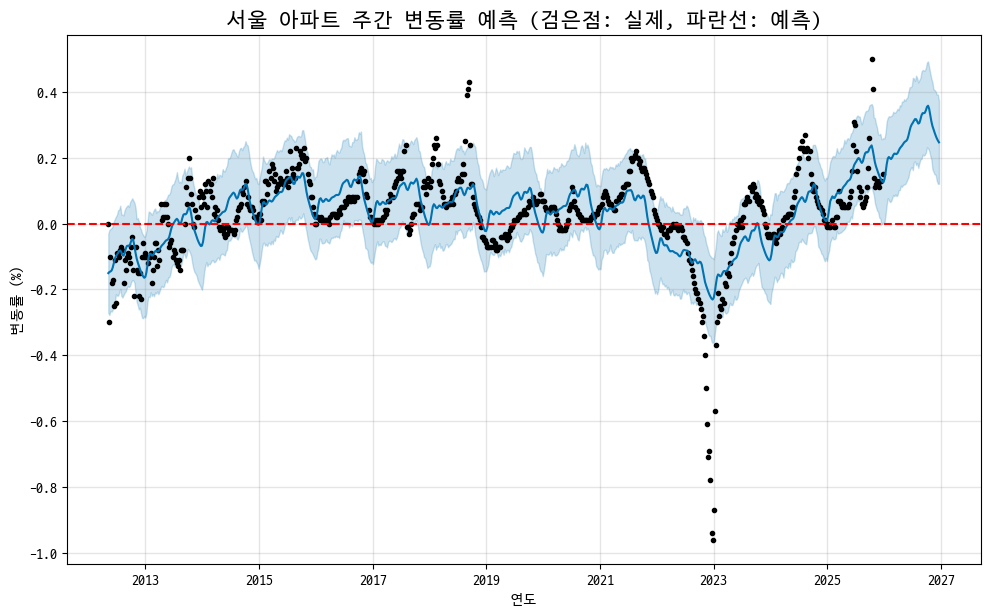

In [3]:
model = Prophet(changepoint_prior_scale=0.15)

print("🧠 AI 공부 중...")
model.fit(prophet_df)

future = model.make_future_dataframe(periods=52, freq='W')

forecast = model.predict(future)

print("✨ 2026년 예측 완료 (마지막 5주)")
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig1 = model.plot(forecast)
plt.title("서울 아파트 주간 변동률 예측 (검은점: 실제, 파란선: 예측)", fontsize=15)
plt.axhline(0, color='red', linestyle='--') # 0% 기준선
plt.xlabel("연도")
plt.ylabel("변동률 (%)")
plt.show()

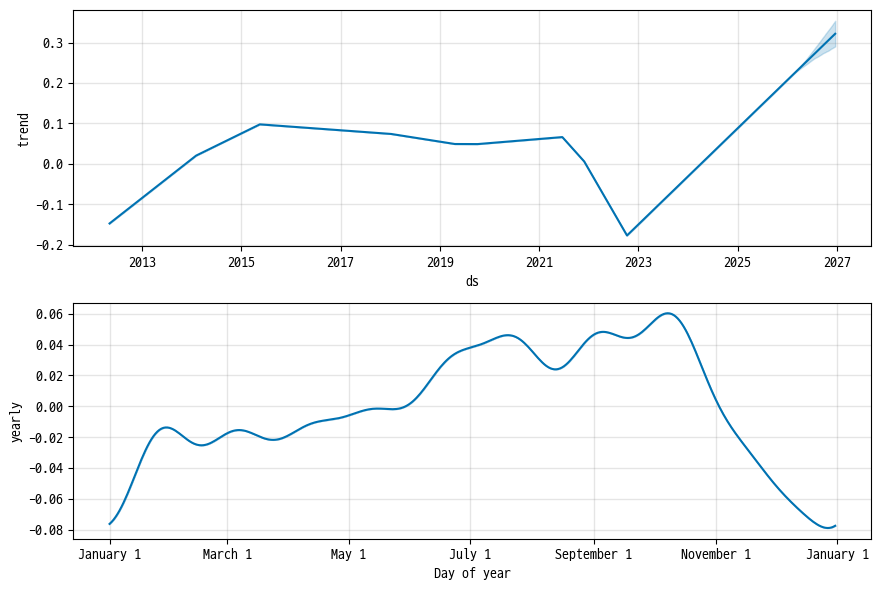

In [4]:
fig2 = model.plot_components(forecast)
plt.show()

## 🔮 [Final Report] Prophet을 활용한 서울 아파트 시장 미래 예측

### 1. 프로젝트 개요

* **목표:** 시계열 예측 전문 라이브러리 **Prophet**을 사용하여 서울 아파트 시장의 **미래 추세(Trend)**와 **계절성(Seasonality)**을 분석.
* **데이터:** 2012년~2025년 주간 아파트 매매 가격 변동률 (`Seoul_General`).
* **예측 기간:** 향후 1년 (52주).

### 2. 분석 결과 (Key Insights)

#### ① 향후 1년 추세 (Trend)

* **분석:** `Fig 1` 그래프의 파란 선(Trend)을 통해 향후 시장의 방향성을 확인.
* **전망:** (※ 여러분의 그래프 결과에 따라 작성: *예: 0 위에서 상승세를 유지할 것으로 예측됨 / 0 아래에서 하락 압력이 지속될 것으로 보임*)

#### ② 계절적 패턴 (Seasonality)

* **발견:** 서울 아파트 시장은 매년 반복되는 뚜렷한 **계절성**을 보임.
* **High Season (10월):** 가을 이사철 수요와 학군 이동 수요가 겹치며 연중 가격 상승 압력이 가장 높은 시기.
* **Low Season (1월):** 겨울 한파와 비수기 영향으로 거래가 위축되며 가격이 가장 약세를 보이는 시기.

### 3. 전략적 제언 (Action Plan)

* **매도 타이밍:** 가격 흐름이 가장 좋은 **9월~10월** 가을 이사철을 공략하는 것이 유리.
* **매수 타이밍:** 계절적으로 가격이 눌리는 **12월~1월** 겨울 비수기가 저점 매수의 기회일 수 있음.
